In [1]:
import numpy as np
import matplotlib.pyplot as plt
import blip_analysis as ba
import exp_blip_models as ebm
import numpy as np
import daskify
from scipy.stats import ttest_ind
import pickle
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tqdm import trange 
import dask
from sklearn.svm import LinearSVC
from scipy.stats import norm
import matplotlib
from label_axes import label_axes
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

b


In [2]:
dasked = daskify.Daskified(memory='16GB')
dasked.start_cluster()

In [2]:
def dask_model_train_and_split(usrt_scattered, ui, trial_array):
    model = ebm.ExponentialCustomTrialArray(usrt_scattered, ui, trial_array)
    model.fit_split()
    return model
def dask_base_model_train_and_split(usrt_scattered, ui):
    model = ebm.ExponentialModel(usrt_scattered, ui)
    model.fit_split()
    return model

In [22]:
unit_usrt1, unit_usrt2, unit_usrt3 = ba.load_usrts()
glyphs = ba.get_glyphs()
good_indexes = ba.get_stable_resp_indexes()
unit_usrt1 = unit_usrt1[good_indexes]
unit_usrt2 = unit_usrt2[good_indexes]
unit_usrt3 = unit_usrt3[good_indexes]


Found odour 1
Found odour 3
Found odour 5


In [ ]:
dasked.scatter_data('usrt1', unit_usrt1)
dasked.scatter_data('usrt2', unit_usrt2)
dasked.scatter_data('usrt3', unit_usrt3)
usrt_scattered1 = dasked.scattered['usrt1']
usrt_scattered2 = dasked.scattered['usrt2']
usrt_scattered3 = dasked.scattered['usrt3']

In [77]:
params = [[usrt_scattered1, usrt_scattered2, usrt_scattered3], range(130), [ebm.trial_arrays['cao_array'][:, 5:], ebm.trial_arrays['cao_array'][:, :5], ebm.trial_arrays['cao_array']]]

In [78]:

futures = dasked.gridsearch(dask_model_train_and_split, *params)

In [138]:
params = [[usrt_scattered1, usrt_scattered2, usrt_scattered3], range(130)]
futures = dasked.gridsearch(dask_base_model_train_and_split, *params)

In [158]:
params = [[usrt_scattered1, usrt_scattered2, usrt_scattered3], range(130), [ebm.trial_arrays['diff_array']]]
futures = dasked.gridsearch(dask_model_train_and_split, *params)

In [96]:
print(np.array(futures[0]).reshape(3, 130, 3, 3)[0, :, 0, 1])

[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129]


In [160]:
dasked.check_progress()
res = dasked.collect_results()

finished 390


In [161]:
res = np.array(res).reshape(3, 130)
diff_models1 = res[0]
diff_models2 = res[1]
diff_models3 = res[2]

In [146]:
res = np.array(res).reshape(3, 130)
base_models1 = res[0]
base_models2 = res[1]
base_models3 = res[2]

In [86]:
res = np.array(res).reshape(3, 130, 3)

In [97]:
conc_models1 = res[0, :, 0]
conc_models2 = res[1, :, 0]
conc_models3 = res[2, :, 0]
onset_models1 = res[0, :, 1]
onset_models2 = res[1, :, 1]
onset_models3 = res[2, :, 1]
cao_models1 = res[0, :, 2]
cao_models2 = res[1, :, 2]
cao_models3 = res[2, :, 2]


In [2]:
conc_models1 = pickle.Unpickler(open('230320_conc_models1.pkl', 'rb')).load()
conc_models2 = pickle.Unpickler(open('230320_conc_models2.pkl', 'rb')).load()
conc_models3 = pickle.Unpickler(open('230320_conc_models3.pkl', 'rb')).load()
onset_models1 = pickle.Unpickler(open('230320_onset_models1.pkl', 'rb')).load()
onset_models2 = pickle.Unpickler(open('230320_onset_models2.pkl', 'rb')).load()
onset_models3 = pickle.Unpickler(open('230320_onset_models3.pkl', 'rb')).load()
cao_models1 = pickle.Unpickler(open('230320_cao_models1.pkl', 'rb')).load()
cao_models2 = pickle.Unpickler(open('230320_cao_models2.pkl', 'rb')).load()
cao_models3 = pickle.Unpickler(open('230320_cao_models3.pkl', 'rb')).load()
diff_models1 = pickle.Unpickler(open('230320_diff_models1.pkl', 'rb')).load()
diff_models2 = pickle.Unpickler(open('230320_diff_models2.pkl', 'rb')).load()
diff_models3 = pickle.Unpickler(open('230320_diff_models3.pkl', 'rb')).load()
base_models1 = pickle.Unpickler(open('230320_base_models1.pkl', 'rb')).load()
base_models2 = pickle.Unpickler(open('230320_base_models2.pkl', 'rb')).load()
base_models3 = pickle.Unpickler(open('230320_base_models3.pkl', 'rb')).load()

In [3]:
conc_test_scores1 = np.array([i.test_scores.mean(axis=-1) for i in conc_models1])
conc_test_scores2 = np.array([i.test_scores.mean(axis=-1) for i in conc_models2])
conc_test_scores3 = np.array([i.test_scores.mean(axis=-1) for i in conc_models3])
onset_test_scores1 = np.array([i.test_scores.mean(axis=-1) for i in onset_models1])
onset_test_scores2 = np.array([i.test_scores.mean(axis=-1) for i in onset_models2])
onset_test_scores3 = np.array([i.test_scores.mean(axis=-1) for i in onset_models3])

mean_conc_test_scores1 = conc_test_scores1.mean(axis=-1)
mean_conc_test_scores2 = conc_test_scores2.mean(axis=-1)
mean_conc_test_scores3 = conc_test_scores3.mean(axis=-1)
mean_onset_test_scores1 = onset_test_scores1.mean(axis=-1)
mean_onset_test_scores2 = onset_test_scores2.mean(axis=-1)
mean_onset_test_scores3 = onset_test_scores3.mean(axis=-1)


(-0.4799426724215461, 2.0061651539338916)

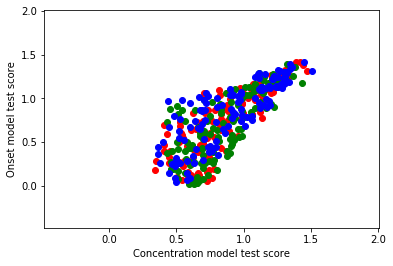

In [6]:
plt.scatter(mean_conc_test_scores1, mean_onset_test_scores1, color='r')
plt.scatter(mean_conc_test_scores2, mean_onset_test_scores2, color='g')
plt.scatter(mean_conc_test_scores3, mean_onset_test_scores3, color='b')
plt.xlabel('Concentration model test score')
plt.ylabel('Onset model test score')
max_lims = np.max([np.max(mean_conc_test_scores1), np.max(mean_conc_test_scores2), np.max(mean_conc_test_scores3), np.max(mean_onset_test_scores1), np.max(mean_onset_test_scores2), np.max(mean_onset_test_scores3)])
min_lims = np.min([np.min(mean_conc_test_scores1), np.min(mean_conc_test_scores2), np.min(mean_conc_test_scores3), np.min(mean_onset_test_scores1), np.min(mean_onset_test_scores2), np.min(mean_onset_test_scores3)])
plt.xlim(min_lims-0.5, max_lims+0.5)
plt.ylim(min_lims-0.5, max_lims+0.5)

In [4]:
avg_diff1 = (conc_test_scores1 - onset_test_scores1).mean(axis=-1)
avg_diff2 = (conc_test_scores2 - onset_test_scores2).mean(axis=-1)
avg_diff3 = (conc_test_scores3 - onset_test_scores3).mean(axis=-1)

In [5]:
std_diffs1 = (conc_test_scores1 - onset_test_scores1).std(axis=-1)
std_diffs2 = (conc_test_scores2 - onset_test_scores2).std(axis=-1)
std_diffs3 = (conc_test_scores3 - onset_test_scores3).std(axis=-1)

In [6]:
def find_best_fits(conc_models, onset_models, colors_base=['r', 'b', 'gray']):
    ttests = []
    ttests_conc = []
    ttests_onset = []
    colors = []
    conc_scores = np.array([i.test_scores.mean(axis=-1) for i in conc_models])
    onset_scores = np.array([i.test_scores.mean(axis=-1) for i in onset_models])
    
    for i in range(130):
        ttest = ttest_ind(conc_scores[i], onset_scores[i], equal_var=False)[1]*130
        ttests.append(ttest)
        if ttest < 0.05 and np.mean(conc_scores[i]) < np.mean(onset_scores[i]):
            ttests_conc.append(i)
            colors.append(colors_base[0])
        elif ttest < 0.05 and np.mean(conc_scores[i]) > np.mean(onset_scores[i]):
            ttests_onset.append(i)
            colors.append(colors_base[1])
        else:
            colors.append(colors_base[2])
    return ttests_conc, ttests_onset, colors
_, _, colors = find_best_fits(conc_models3, onset_models3)
print(_)

[2, 3, 4, 5, 6, 8, 11, 12, 14, 16, 18, 19, 20, 21, 24, 25, 29, 31, 33, 34, 35, 37, 38, 39, 40, 42, 45, 46, 47, 50, 51, 63, 72, 74, 75, 81, 83, 84, 85, 87, 88, 89, 90, 91, 94, 95, 98, 99, 101, 102, 103, 104, 105, 111, 112, 129]


20 61


array([ 63,  60,  55,  58,  68,  59, 122,  62, 123,  53,  66,  70,  64,
        52,  73,  65, 124,  71, 120,  43,  57,  50,   4, 125, 106, 127,
        26,   2, 113,  77,  67,  61,  54,  92,  16,  17, 129,   6,  25,
       118,   1,  81, 109,  22, 107,  44,  78,  98,  91,  32,  11, 110,
        41, 108, 128,  15,  28,  31,  14,  89,  24,  13,   7, 112,  69,
        97, 121,  19,   8,  46,   9,  30,  36,  20, 115,  51,  56,   0,
        12, 111,  37,   5,  83, 126,  21,  23, 105,  42, 114, 116,  29,
        84,  27,  33,  39,  18, 119,  49, 102, 117,  47,  38, 100,  74,
        10, 101,  82, 104,   3,  45,  90,  48, 103,  87,  85,  86,  99,
        40,  34,  79,  88,  76,  80,  95,  75,  96,  93,  94,  35,  72])

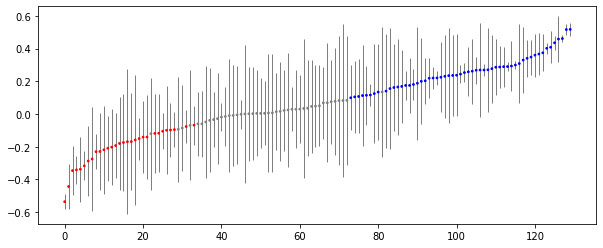

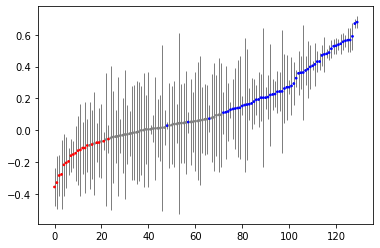

In [7]:

sorted_diff = np.argsort(avg_diff3)
fig = plt.figure(figsize=(10, 4))

plt.errorbar(range(130), avg_diff3[sorted_diff], yerr=std_diffs3[sorted_diff], fmt='.', color='k',  markersize=0, elinewidth=0.5)
plt.scatter(range(130), avg_diff3[sorted_diff], c=np.array(colors)[sorted_diff], s=3, zorder=10)

def plot_difference_distributions(ax, conc_models, onset_models, color=['r', 'b']):
    conc_test_scores = np.array([i.test_scores.mean(axis=-1) for i in conc_models])
    onset_test_scores = np.array([i.test_scores.mean(axis=-1) for i in onset_models])
    diffs = np.array(conc_test_scores - onset_test_scores)
    sorted_arg = np.argsort(diffs.mean(axis=-1))
    ax.errorbar(range(130), diffs.mean(axis=-1)[sorted_arg], yerr=diffs.std(axis=-1)[sorted_arg], fmt='.', color='k',  markersize=0, elinewidth=0.5)
    conc_best, onset_best, colors = find_best_fits(conc_models, onset_models, colors_base=color+['gray'])
    ax.scatter(range(130), diffs.mean(axis=-1)[sorted_arg], c=np.array(colors)[sorted_arg], s=3, zorder=10)
    print(len(conc_best), len(onset_best))
    return sorted_arg
    
fig = plt.figure()
ax = fig.add_subplot(111)
plot_difference_distributions(ax, conc_models1, onset_models1)

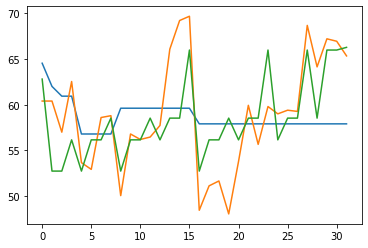

In [8]:
ui = 63
plt.plot(onset_models1[ui].pred_resp)
plt.plot(onset_models1[ui].true_resp)
plt.plot(conc_models1[ui].pred_resp)

20 61
17 79
30 56


[]

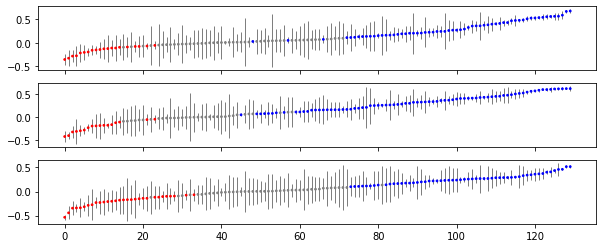

In [9]:
fig = plt.figure(figsize=(10, 4))
gs = GridSpec(3, 1)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
plot_difference_distributions(ax1, conc_models1, onset_models1)
plot_difference_distributions(ax2, conc_models2, onset_models2)
plot_difference_distributions(ax3, conc_models3, onset_models3)
ax1.set_xticklabels([])
ax2.set_xticklabels([])


In [10]:
def plot_model_response(ax, model, colors=None):
    if colors is None:
        resp_color = 'k'
        pred_color = 'C0'
    else:
        resp_color = colors[0]
        pred_color = colors[1]
    ax.errorbar(np.arange(32)+0.1, model.pred_test_avg.mean(axis=0), yerr=(model.pred_test_avg.mean(axis=0) - model.pred_test_avg.min(axis=0), model.pred_test_avg.max(axis=0) - model.pred_test_avg.mean(axis=0)), fmt='.', color=pred_color,  markersize=0, elinewidth=0.5)
    ax.errorbar(np.arange(32)-0.1, model.X_test_avg.mean(axis=0), yerr=(model.X_test_avg.mean(axis=0) - model.X_test_avg.min(axis=0), model.X_test_avg.max(axis=0) - model.X_test_avg.mean(axis=0)),fmt='.', color=resp_color,  markersize=0, elinewidth=0.5)
    ax.scatter(np.arange(32)+0.1, model.pred_test_avg.mean(axis=0), color=pred_color, s=3, zorder=10)
    ax.scatter(np.arange(32)-0.1, model.X_test_avg.mean(axis=0), color=resp_color, s=3, zorder=10)
    ax.set_xticks(range(32));
    ax.set_xticklabels(glyphs, rotation=90);

def plot_models_response(ax, models, isi=1, labels=None, colors=None, fontsize=8, legend=True):
    num_steps = len(models)
    if not isinstance(models, list):
        models = [models]
    else:
        if labels is None:
            labels = [None]*(len(models)+1)
    if colors is None:
        colors = ['C{}'.format(i) for i in range(len(models)+1)]
    ax.errorbar(np.arange(0, 32*isi, isi), models[0].X_test_avg.mean(axis=0), yerr=(models[0].X_test_avg.mean(axis=0) - models[0].X_test_avg.min(axis=0), models[0].X_test_avg.max(axis=0) - models[0].X_test_avg.mean(axis=0)),fmt='.', color=colors[0],  markersize=0, elinewidth=0.5)
    ax.scatter(np.arange(0, 32*isi, isi), models[0].X_test_avg.mean(axis=0), color=colors[0], s=3, zorder=10, label=labels[0])
    for i, model in enumerate(models):
        ax.errorbar(np.arange(0, 32*isi, isi)+0.2+(i*0.2), model.pred_test_avg.mean(axis=0), yerr=(model.pred_test_avg.mean(axis=0) - model.pred_test_avg.min(axis=0), model.pred_test_avg.max(axis=0) - model.pred_test_avg.mean(axis=0)), fmt='.', color=colors[i+1],  markersize=0, elinewidth=0.5)
        ax.scatter(np.arange(0, 32*isi, isi)+0.2+(i*0.2), model.pred_test_avg.mean(axis=0), color=colors[i+1], s=3, zorder=10, label=labels[i+1])
    x_ticks = np.arange(0, 32*isi, isi) + num_steps*0.2/2
    ax.set_xticks(x_ticks);
    ax.set_xticklabels(glyphs, rotation=90, fontsize=fontsize);
    if labels[0] is not None:
        if legend:
            ax.legend()

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

def plot_split_models_response(ax1, ax2, model1, model2, isi=1, colors=None, fontsize=8, legend=True, labels=None):
    if colors is None:
        colors = ['k', 'C0', 'C1']
    ax1.errorbar(np.arange(0, 32*isi, isi), model1.X_test_avg.mean(axis=0), yerr=(model1.X_test_avg.mean(axis=0) - model1.X_test_avg.min(axis=0), model1.X_test_avg.max(axis=0) - model1.X_test_avg.mean(axis=0)),fmt='.', color=colors[0],  markersize=0, elinewidth=0.5)
    ax1.scatter(np.arange(0, 32*isi, isi), model1.X_test_avg.mean(axis=0), color=colors[0], s=3, zorder=10)
    ax1.errorbar(np.arange(0, 32*isi, isi), model1.pred_test_avg.mean(axis=0), yerr=(model1.pred_test_avg.mean(axis=0) - model1.pred_test_avg.min(axis=0), model1.pred_test_avg.max(axis=0) - model1.pred_test_avg.mean(axis=0)), fmt='.', color=colors[1],  markersize=0, elinewidth=0.5)
    ax1.scatter(np.arange(0, 32*isi, isi), model1.pred_test_avg.mean(axis=0), color=colors[1], s=3, zorder=10)

    ax2.errorbar(np.arange(0, 32*isi, isi), model2.X_test_avg.mean(axis=0), yerr=(model2.X_test_avg.mean(axis=0) - model2.X_test_avg.min(axis=0), model2.X_test_avg.max(axis=0) - model2.X_test_avg.mean(axis=0)),fmt='.', color=colors[0],  markersize=0, elinewidth=0.5)
    ax2.scatter(np.arange(0, 32*isi, isi), model2.X_test_avg.mean(axis=0), color=colors[0], s=3, zorder=10)
    ax2.errorbar(np.arange(0, 32*isi, isi), model2.pred_test_avg.mean(axis=0), yerr=(model2.pred_test_avg.mean(axis=0) - model2.pred_test_avg.min(axis=0), model2.pred_test_avg.max(axis=0) - model2.pred_test_avg.mean(axis=0)), fmt='.', color=colors[2],  markersize=0, elinewidth=0.5)
    ax2.scatter(np.arange(0, 32*isi, isi), model2.pred_test_avg.mean(axis=0), color=colors[2], s=3, zorder=10)

    x_ticks = np.arange(0, 32*isi, isi)
    ax1.set_xticks(x_ticks);
    ax1.set_xticklabels(glyphs, rotation=90, fontsize=fontsize);
    ax2.set_xticks(x_ticks);
    ax2.set_xticklabels(glyphs, rotation=90, fontsize=fontsize);
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.set_yticklabels([])
    [ax2.scatter([], [], color=colors[i], s=3, label=labels[i]) for i in range(len(colors))]
    
    if legend:
        ax2.legend()

NameError: name 'low_conc_model' is not defined

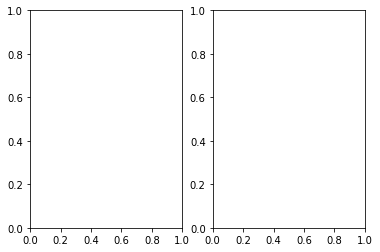

In [11]:
fig, ax = plt.subplots(1, 2, sharex=True)
# plot_model_response(ax[0], low_conc_model, colors=['k', 'r'])
# plot_model_response(ax[1], low_onset_model, colors=['k', 'b'])
# [i.spines['right'].set_visible(False) for i in ax]
# [i.spines['top'].set_visible(False) for i in ax]

plot_split_models_response(ax[0], ax[1], low_conc_model, low_onset_model, colors=['k', 'r', 'b'], fontsize=8, legend=False, labels=['True', 'Conc', 'Onset'])

36 26
29 28
43 12


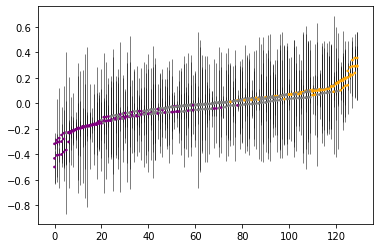

In [ ]:
fig, ax = plt.subplots(1, 1)
sorted_args1 = plot_difference_distributions(ax, diff_models1, cao_models1, color=['purple', 'orange'])
sorted_args2 = plot_difference_distributions(ax, diff_models2, cao_models2, color=['purple', 'orange'])
sorted_args3 = plot_difference_distributions(ax, diff_models3, cao_models3, color=['purple', 'orange'])

In [11]:
print(sorted_args3)

[ 40 106   6  48  47 128 108  92 119  93 115  50  42   0  79  96 117 124
  80  32  62 122  76  35 120 116 101  43 121  73 125 126   8  88  71 107
  56  54  69  60  85  82 118  28  72  55 123  31  51   3  37  86  94 104
  36  45  38  39 109  75  77   5   2   1  23  20  41  90  95 105  64  74
 114  15 127 111  10  24  81  46 100  34  53  67 103  83  98  91  44  17
  97  58  19  61  63   4  57  66  14   7  68 129  70  13  59  52  11  22
  65   9  21  84  49 102  26  78  12  89  16 113  27  30  87  25  33  99
 112  18  29 110]


[ 0.2  2.2  4.2  6.2  8.2 10.2 12.2 14.2 16.2 18.2 20.2 22.2 24.2 26.2
 28.2 30.2 32.2 34.2 36.2 38.2 40.2 42.2 44.2 46.2 48.2 50.2 52.2 54.2
 56.2 58.2 60.2 62.2]
[None, None]
[ 0.1  1.1  2.1  3.1  4.1  5.1  6.1  7.1  8.1  9.1 10.1 11.1 12.1 13.1
 14.1 15.1 16.1 17.1 18.1 19.1 20.1 21.1 22.1 23.1 24.1 25.1 26.1 27.1
 28.1 29.1 30.1 31.1]
[None]


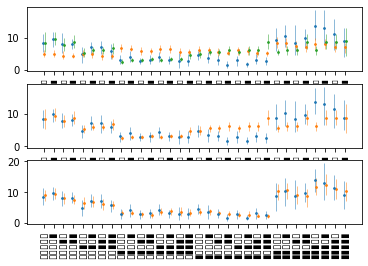

In [14]:
fig, ax = plt.subplots(3, 1)
plot_models_response(ax[0],[ base_models3[sorted_args3[0]], cao_models3[sorted_args3[0]]], isi=2)
plot_models_response(ax[1], [cao_models3[sorted_args3[0]]])
plot_model_response(ax[2], diff_models3[sorted_args3[0]])


32 22
25 34
34 39


array([125, 113,  59,  54, 119, 110,  32, 123,  96, 117,  28,  61,  93,
       121, 116, 126, 115,  62,  52, 106,  58,  80,  79, 109,  94,  88,
       107,  48,  86,  92,  60, 114,  95,  85, 105,  76,  64,  42, 118,
        75,  72,  74,  31,  40,  39, 108,  50, 100,  77,  98,  81,  55,
        91,  14,  99,  36,  90,  37,  34, 112,  84, 103, 120,  68,  18,
       127,  56,  57,  21, 104,  65,  38,  67, 101,  83,  29,  73,  70,
       124,  63,  53,  89,  51, 102,  10,  87,   1,  26,  46,  66,   4,
        35,  16,  25,  17,   2,  47,  41,   3,  11,   9,  44, 122,  19,
        13,  33,  43, 111,  69,  71,  23, 129,   6,   0,   8,  82,   7,
        45,  22,  78,  12,  97,  20,  27,  30,  49,  15,  24, 128,   5])

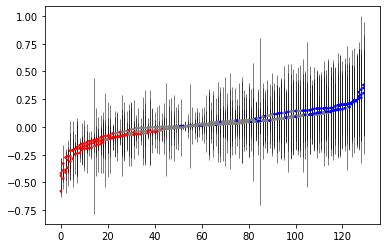

In [14]:
fig, ax = plt.subplots(1, 1)
plot_difference_distributions(ax, cao_models1, onset_models1)
plot_difference_distributions(ax, cao_models2, onset_models2)
plot_difference_distributions(ax, cao_models3, onset_models3)

In [12]:
avg_conc_scores1 = np.array([i.test_scores.mean() for i in conc_models1])
avg_conc_scores2 = np.array([i.test_scores.mean() for i in conc_models2])
avg_conc_scores3 = np.array([i.test_scores.mean() for i in conc_models3])

avg_onset_scores1 = np.array([i.test_scores.mean() for i in onset_models1])
avg_onset_scores2 = np.array([i.test_scores.mean() for i in onset_models2])
avg_onset_scores3 = np.array([i.test_scores.mean() for i in onset_models3])

avg_base_scores1 = np.array([i.test_scores.mean() for i in base_models1])
avg_base_scores2 = np.array([i.test_scores.mean() for i in base_models2])
avg_base_scores3 = np.array([i.test_scores.mean() for i in base_models3])

avg_diff_scores1 = np.array([i.test_scores.mean() for i in diff_models1])
avg_diff_scores2 = np.array([i.test_scores.mean() for i in diff_models2])
avg_diff_scores3 = np.array([i.test_scores.mean() for i in diff_models3])

avg_cao_scores1 = np.array([i.test_scores.mean() for i in cao_models1])
avg_cao_scores2 = np.array([i.test_scores.mean() for i in cao_models2])
avg_cao_scores3 = np.array([i.test_scores.mean() for i in cao_models3])


{'bodies': [<matplotlib.collections.PolyCollection at 0x7f962c791f98>,
 'cmeans': <matplotlib.collections.LineCollection at 0x7f962c791978>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f962c7979e8>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f962c7972e8>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f962c6ef320>}

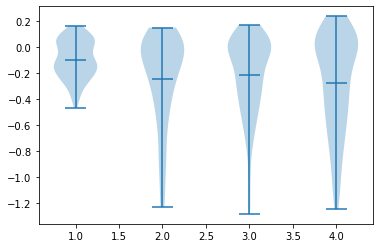

In [16]:
plt.violinplot(np.log10([avg_conc_scores1, avg_onset_scores1, avg_base_scores1, avg_diff_scores1, ]).T, showmeans=True)


In [18]:
print(np.argmax(avg_diff_scores1))
print(np.argmin(avg_diff_scores1))
print(np.where(avg_diff_scores1 == np.percentile(avg_diff_scores1, 50, interpolation='nearest')))

5
91
(array([60]),)


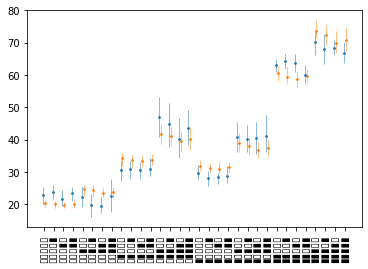

In [19]:
model = diff_models1[91]
model.X_test_avg.shape
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.errorbar(np.arange(32)+0.1, model.pred_test_avg.mean(axis=0), yerr=(model.pred_test_avg.mean(axis=0) - model.pred_test_avg.min(axis=0), model.pred_test_avg.max(axis=0) - model.pred_test_avg.mean(axis=0)), fmt='.', color='C1',  markersize=0, elinewidth=0.5)
# ax.errorbar(np.arange(32)-0.1, model.X_test_avg.mean(axis=0), yerr=(model.X_test_avg.mean(axis=0) - model.X_test_avg.min(axis=0), model.X_test_avg.max(axis=0) - model.X_test_avg.mean(axis=0)),fmt='.', color='C0',  markersize=0, elinewidth=0.5)
# ax.scatter(np.arange(32)+0.1, model.pred_test_avg.mean(axis=0), color='C1', s=3, zorder=10)
# ax.scatter(np.arange(32)-0.1, model.X_test_avg.mean(axis=0), color='C0', s=3, zorder=10)
# ax.set_xticks(range(32));
# ax.set_xticklabels(glyphs, rotation=90);



plot_model_response(ax, model)


In [20]:
print(model.pred_test_avg.max(axis=0))
print(model.pred_test_avg.mean(axis=0))

[21.27545416 20.89941778 20.63076062 21.50795995 26.03718729 25.89026596
 25.00300815 25.43992704 35.7041745  35.06195571 35.30499299 35.5345893
 44.80147076 43.88788733 42.6509211  43.93026664 33.55197523 32.78804153
 32.90482175 33.06966852 42.11975686 40.7522074  39.25427284 39.83645869
 62.9013316  62.62925665 60.93134458 61.93877671 77.13102317 75.5581814
 73.59015262 74.50951492]
[20.27503981 19.91156534 19.71863347 19.95680275 24.69535936 24.25285613
 23.43823846 23.72483573 34.25771219 33.64394403 33.31864612 33.72050104
 41.71439099 40.96738808 39.59435012 40.07239978 31.89501815 31.32205956
 31.01980552 31.39440556 38.85071757 38.1530099  36.87505422 37.32592589
 60.53607005 59.44925471 58.8748412  59.58702931 73.69435572 72.37191897
 69.95109425 70.79809959]


In [22]:
conc_models1[0].pred_test_avg.shape

(100, 32)

In [13]:
def split_and_classify(usrt_scattered, trial_indexes, scaled=True, shuffle=False, unit_count=130, classifier=LinearSVC, classifier_params={}):
    unit_indexes = np.random.choice(range(130), replace=False, size=unit_count)
    train, test = ba.split_bs_data(usrt_scattered[unit_indexes])
    train_sum = train.sum(axis=-1)[:, trial_indexes].reshape(unit_count, -1).T
    test_sum = test.sum(axis=-1)[:, trial_indexes].reshape(unit_count, -1).T
    y_train = np.hstack([[i for j in range(60)] for i in trial_indexes])
    y_test = trial_indexes
    
    if scaled:
        scaler = StandardScaler()
        train_sum = scaler.fit_transform(train_sum)
        test_sum = scaler.transform(test_sum)
    svm = classifier(**classifier_params)
    if shuffle:
        np.random.shuffle(y_train)
    svm.fit(train_sum, y_train)
    return svm.score(test_sum, y_test), svm.predict(test_sum)


In [23]:
classifier = RandomForestClassifier()
conc_X = np.array([i.pred_test_avg for i in conc_models1]).reshape(130, -1)
print(conc_X.shape)
onset_X =  np.array([i.pred_test_avg for i in onset_models1]).reshape(130, -1)
diff_X = np.array([i.pred_test_avg for i in diff_models1]).reshape(130, -1)
base_X = np.array([i.pred_test_avg for i in base_models1]).reshape(130, -1)
y = [i for j in range(100) for i in range(32)]
print(y)
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(onset_X.T, y, test_size=0.2, random_state=42, stratify=y)
np.random.normal(0, 0.2, )
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)


(130, 3200)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1

In [25]:
cm = confusion_matrix(y_test, pred, labels=range(32), normalize='true')

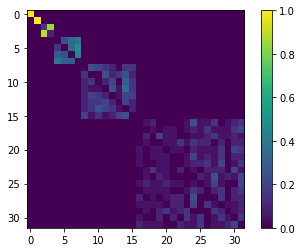

In [26]:
plt.imshow(cm)
plt.colorbar()

In [18]:
def dask_svm(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y)
    svm = RandomForestClassifier()
    svm.fit(X_train, y_train)
    pred = svm.predict(X_test)
    return pred, y_test

def generate_noisy_data(models, noise_level=10,repeats=60, method='add', unit_var_scale=1):
    all_pred_firings = []
    trial_array1 = np.append(models[0].trial_array, np.ones((32, 1)), axis=1)
    for model in models:
        pred_firings= []
        if len(model.pred_resp) != 32:
            model.fit()
        for i in range(repeats):
            if method == 'add':
                pred_firing  = model.pred_resp + norm.rvs(0, noise_level, size=32)
            elif method == 'unit_var':
                pred_firing = model.pred_resp + np.array([norm.rvs(0, j, size=1)[0]*unit_var_scale for j in model.unit_sr_var])
            pred_firings.append(pred_firing)
        all_pred_firings.append(pred_firings)
    all_pred_firings = np.array(all_pred_firings)
#    ys = [i for j in range(60) for i in range(32)]
    return all_pred_firings

def generate_and_dask(models, noise_level=10, repeats=100, method='unit_var', unit_var_scale=1, wait=True):
    X = generate_noisy_data(models, noise_level=noise_level, method=method, unit_var_scale=unit_var_scale).reshape(len(models), -1).T
    X_scattered = dasked.client.scatter(X)
    
    delayeds = [dask.delayed(dask_svm)(X_scattered, y_scatter, 32) for i in range(repeats)]
    dask_outs = dasked.client.compute(delayeds)
    dasked.current_futures = dask_outs
    # # if wait:
    # #     res = np.array([i.result() for i in dask_outs])
    # #     cm = confusion_matrix(res[:, 1].reshape(-1), res[:, 0].reshape(-1), labels=range(32), normalize='true')
    # #     return res, cm
    # # else:
    #     return dask_outs

In [19]:
ys = [i for j in range(60) for i in range(32)]
y_scatter = dasked.client.scatter(ys)

In [29]:
all_futures = []
for models in [diff_models1, diff_models2, diff_models3]:
    for i in trange(20):
        generate_and_dask(models, method='add', noise_level=i)
        all_futures.append(dasked.current_futures)
all_futures = np.concatenate(all_futures)
dasked.current_futures = all_futures
dasked.current_futures = list(all_futures)

100%|██████████| 20/20 [00:23<00:00,  1.19s/it]


In [20]:
all_futures = []
for models in [onset_models1, conc_models1, cao_models1]:
    for i in trange(20):
        generate_and_dask(models, method='add', noise_level=i)
        all_futures.append(dasked.current_futures)
all_futures = np.concatenate(all_futures)
dasked.current_futures = all_futures
dasked.current_futures = list(dasked.current_futures)

100%|██████████| 20/20 [00:20<00:00,  1.02s/it]


In [43]:
all_futures = []
for models in [onset_models2, conc_models2, cao_models2, onset_models3, conc_models3, cao_models3]:
    for i in trange(20):
        generate_and_dask(models, method='add', noise_level=i)
        all_futures.append(dasked.current_futures)
all_futures = np.concatenate(all_futures)
dasked.current_futures = all_futures
dasked.current_futures = list(dasked.current_futures)

100%|██████████| 20/20 [00:23<00:00,  1.17s/it]


In [21]:
dasked.current_futures = list(dasked.current_futures)

In [44]:
dasked.check_progress()

finished 12000


In [26]:
data_onset_conc = dasked.collect_results()
data_onset_conc = np.array(data_onset_conc).reshape(3, 20, 100, 2, 32)

In [31]:
data_diffs = dasked.collect_results()
data_diffs = np.array(data_diffs).reshape(3, 20, 100, 2, 32)


In [45]:
data_all_onset_conc = dasked.collect_results()
data_all_onset_conc = np.array(data_all_onset_conc).reshape(6, 20, 100, 2, 32)

In [126]:
data_joined = np.concatenate([data_diffs, data_onset_conc, data_all_onset_conc], axis=0)
np.save('230612_data_joined.npy', data_joined)

In [14]:
data_joined = np.load('230612_data_joined.npy')


In [15]:
#cms = [confusion_matrix(data[i, :, 1].reshape(-1), data[i, :, 0].reshape(-1), labels=range(32), normalize='true') for i in range(20)]
cms1 = [confusion_matrix(data_joined[0, i, :, 1].reshape(-1), data_joined[0, i, :, 0].reshape(-1), labels=range(32), normalize='true') for i in range(20)]
cms2 = [confusion_matrix(data_joined[1, i, :, 1].reshape(-1), data_joined[1, i, :, 0].reshape(-1), labels=range(32), normalize='true') for i in range(20)]
cms3 = [confusion_matrix(data_joined[2, i, :, 1].reshape(-1), data_joined[2, i, :, 0].reshape(-1), labels=range(32), normalize='true') for i in range(20)]
cms_conc1 = [confusion_matrix(data_joined[4, i, :, 1].reshape(-1), data_joined[4, i, :, 0].reshape(-1), labels=range(32), normalize='true') for i in range(20)]
cms_onset1 = [confusion_matrix(data_joined[3, i, :, 1].reshape(-1), data_joined[3, i, :, 0].reshape(-1), labels=range(32), normalize='true') for i in range(20)]
cms_joined1 = [confusion_matrix(data_joined[5, i, :, 1].reshape(-1), data_joined[5, i, :, 0].reshape(-1), labels=range(32), normalize='true') for i in range(20)]
cms_conc2 = [confusion_matrix(data_joined[6, i, :, 1].reshape(-1), data_joined[6, i, :, 0].reshape(-1), labels=range(32), normalize='true') for i in range(20)]
cms_onset2 = [confusion_matrix(data_joined[7, i, :, 1].reshape(-1), data_joined[7, i, :, 0].reshape(-1), labels=range(32), normalize='true') for i in range(20)]
cms_joined2 = [confusion_matrix(data_joined[8, i, :, 1].reshape(-1), data_joined[8, i, :, 0].reshape(-1), labels=range(32), normalize='true') for i in range(20)]
cms_conc3 = [confusion_matrix(data_joined[9, i, :, 1].reshape(-1), data_joined[9, i, :, 0].reshape(-1), labels=range(32), normalize='true') for i in range(20)]
cms_onset3 = [confusion_matrix(data_joined[10, i, :, 1].reshape(-1), data_joined[10, i, :, 0].reshape(-1), labels=range(32), normalize='true') for i in range(20)]
cms_joined3 = [confusion_matrix(data_joined[11, i, :, 1].reshape(-1), data_joined[11, i, :, 0].reshape(-1), labels=range(32), normalize='true') for i in range(20)]

In [18]:
cm = confusion_matrix(data[:, 1].reshape(-1), data[:, 0].reshape(-1), labels=range(32), normalize='true')

NameError: name 'data' is not defined

In [16]:
true_classifiers = pickle.Unpickler(open('../Fig3/../Fig3/230315_full_classifier_RFs.pkl', 'rb')).load()

In [17]:
preds = true_classifiers[:, :, 1]
preds = np.array([np.hstack(i) for i in preds])
trues = [i for j in range(100) for i in range(32)]
cm_true1 = confusion_matrix(trues, preds[0], labels=range(32), normalize='true')
cm_true2 = confusion_matrix(trues, preds[1], labels=range(32), normalize='true')
cm_true3 = confusion_matrix(trues, preds[2], labels=range(32), normalize='true')

In [18]:
corrs1 = np.corrcoef([i.flatten() for i in cms1] + [cm_true1.flatten()])
corrs2 = np.corrcoef([i.flatten() for i in cms2] + [cm_true2.flatten()])
corrs3 = np.corrcoef([i.flatten() for i in cms3] + [cm_true3.flatten()])

diffs1 = [np.sum((i - cm_true1)**2) for i in cms1]
diffs2 = [np.sum((i - cm_true2)**2) for i in cms2]
diffs3 = [np.sum((i - cm_true3)**2) for i in cms3]

corrs_conc1 = np.corrcoef([i.flatten() for i in cms_conc1] + [cm_true1.flatten()])
corrs_onset1 = np.corrcoef([i.flatten() for i in cms_onset1] + [cm_true1.flatten()])
corrs_joined1 = np.corrcoef([i.flatten() for i in cms_joined1] + [cm_true1.flatten()])

corrs_conc2 = np.corrcoef([i.flatten() for i in cms_conc2] + [cm_true2.flatten()])
corrs_onset2 = np.corrcoef([i.flatten() for i in cms_onset2] + [cm_true2.flatten()])
corrs_joined2 = np.corrcoef([i.flatten() for i in cms_joined2] + [cm_true2.flatten()])

corrs_conc3 = np.corrcoef([i.flatten() for i in cms_conc3] + [cm_true3.flatten()])
corrs_onset3 = np.corrcoef([i.flatten() for i in cms_onset3] + [cm_true3.flatten()])
corrs_joined3 = np.corrcoef([i.flatten() for i in cms_joined3] + [cm_true3.flatten()])

diffs_conc = [np.sum((i - cm_true1)**2) for i in cms_conc1]
diffs_onset = [np.sum((i - cm_true1)**2) for i in cms_onset1]
diffs_joined = [np.sum((i - cm_true1)**2) for i in cms_joined1]

11 14
13 17
18 18
0.8255349693645763 2.087
0.756121443445712 2.5134000000000003
0.79363268460144 2.1597999999999997


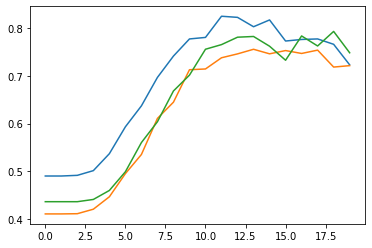

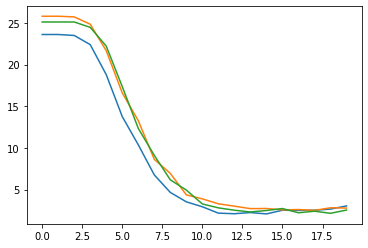

In [18]:
plt.plot(corrs1[-1, :-1])
plt.plot(corrs2[-1, :-1])
plt.plot(corrs3[-1, :-1])
plt.figure()
plt.plot(diffs1)
plt.plot(diffs2)
plt.plot(diffs3)
print(np.argmax(corrs1[-1, :-1]), np.argmin(diffs1))
print(np.argmax(corrs2[-1, :-1]), np.argmin(diffs2))
print(np.argmax(corrs3[-1, :-1]), np.argmin(diffs3))
print(np.max(corrs1[-1, :-1]), np.min(diffs1))
print(np.max(corrs2[-1, :-1]), np.min(diffs2))
print(np.max(corrs3[-1, :-1]), np.min(diffs3))

In [19]:
max_corrs = lambda cms, cm_true: np.max([np.corrcoef(i.flatten(), cm_true.flatten())[0, 1] for i in cms])
diff_corrs = [max_corrs(cms1, cm_true1), max_corrs(cms2, cm_true2), max_corrs(cms3, cm_true3)]
conc_corrs = [max_corrs(cms_conc1, cm_true1), max_corrs(cms_conc2, cm_true2), max_corrs(cms_conc3, cm_true3)]
onset_corrs = [max_corrs(cms_onset1, cm_true1), max_corrs(cms_onset2, cm_true2), max_corrs(cms_onset3, cm_true3)]
joined_corrs = [max_corrs(cms_joined1, cm_true1), max_corrs(cms_joined2, cm_true2), max_corrs(cms_joined3, cm_true3)]
true_corrs = np.triu(np.corrcoef([cm_true1.flatten(), cm_true2.flatten(), cm_true3.flatten()]), 1).flatten()
true_corrs = true_corrs[np.where(true_corrs != 0)]
identiy = [np.corrcoef([i.flatten(), np.identity(32).flatten()])[0, 1] for i in [cm_true1, cm_true2, cm_true3]]
print(identiy)

[0.489757277225493, 0.41008889630176826, 0.4357846050789411]


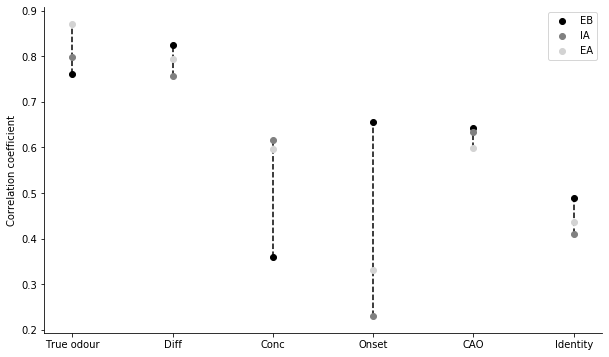

In [20]:
def plot_correlations(true_corrs, diff_corrs, conc_corrs, onset_corrs, joined_corrs, identiy, ax=None):
    if ax is None:
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111)
    
    odour_grays = ['k', 'gray', 'lightgray']
    ax.scatter(range(6), [true_corrs[0], diff_corrs[0], conc_corrs[0], onset_corrs[0], joined_corrs[0], identiy[0]], c=odour_grays[0], label='EB')
    ax.scatter(range(6), [true_corrs[1], diff_corrs[1], conc_corrs[1], onset_corrs[1], joined_corrs[1], identiy[1]], c=odour_grays[1], label='IA')
    ax.scatter(range(6), [true_corrs[2], diff_corrs[2], conc_corrs[2], onset_corrs[2], joined_corrs[2], identiy[2]], c=odour_grays[2], label='EA')

    ax.plot([0, 0], [np.min(true_corrs), np.max(true_corrs)], color='k', linestyle='--', zorder=-10)
    ax.plot([1, 1], [np.min(diff_corrs), np.max(diff_corrs)], color='k', linestyle='--', zorder=-10)
    ax.plot([2, 2], [np.min(conc_corrs), np.max(conc_corrs)], color='k', linestyle='--', zorder=-10)
    ax.plot([3, 3], [np.min(onset_corrs), np.max(onset_corrs)], color='k', linestyle='--', zorder=-10)
    ax.plot([4, 4], [np.min(joined_corrs), np.max(joined_corrs)], color='k', linestyle='--', zorder=-10)
    ax.plot([5, 5], [np.min(identiy), np.max(identiy)], color='k', linestyle='--', zorder=-10)

    ax.legend()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks(range(6))
    ax.set_xticklabels(['True odour', 'Diff', 'Conc', 'Onset', 'CAO', 'Identity'])
    ax.set_ylabel('Correlation coefficient')
plot_correlations(true_corrs, diff_corrs, conc_corrs, onset_corrs, joined_corrs, identiy)

11
15
17


(<matplotlib.image.AxesImage at 0x7f2f90a01978>, 0.95)

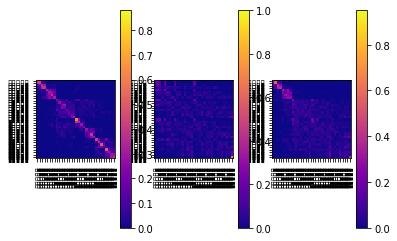

In [23]:
def plot_best_cm(ax, cms, true_cm, fontsize=8, show_xticks=True, show_yticks=True, colorbar=True):
    best_idx = np.argmax([np.corrcoef(i.flatten(), true_cm.flatten())[0, 1] for i in cms])
    print(best_idx)
    
    im = ax.imshow(cms[best_idx], cmap='plasma', vmin=0)
    
    ax.set_xticks(range(32))
    ax.set_yticks(range(32))
    if show_xticks:
        ax.set_xticklabels(glyphs, rotation=90, fontsize=fontsize)
    else:
        ax.set_xticklabels([])
    if show_yticks:
        ax.set_yticklabels(glyphs, fontsize=fontsize)
    else:
        ax.set_yticklabels([])
    ax.set_ylim(31.5, -0.5)
    if colorbar:
        plt.colorbar(mappable=im, ax=ax)
    return im, np.max(cms[best_idx])
fig, ax = plt.subplots(1,3)
plot_best_cm(ax[0], cms1, cm_true1)
plot_best_cm(ax[1], cms_conc1, cm_true1)
plot_best_cm(ax[2], cms_joined1, cm_true1)

In [123]:
print(cms1[11])

[[0.88 0.1  0.02 ... 0.   0.   0.  ]
 [0.37 0.44 0.11 ... 0.   0.   0.  ]
 [0.04 0.21 0.39 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.31 0.16 0.12]
 [0.   0.   0.   ... 0.14 0.29 0.28]
 [0.   0.   0.   ... 0.15 0.3  0.36]]


In [23]:
cm_true2 = confusion_matrix(trues, preds[1], labels=range(32), normalize='true')
cm_true3 = confusion_matrix(trues, preds[2], labels=range(32), normalize='true')
print(np.sum((cm_true - cm_true2)**2))

NameError: name 'cm_true' is not defined

In [56]:
print(np.corrcoef(cm_true.flatten(), cm_true2.flatten()))

[[1.         0.76200179]
 [0.76200179 1.        ]]


In [62]:
print((cm_true-cm_true2))

[[ 0.41 -0.38 -0.03 ...  0.    0.    0.  ]
 [-0.55  0.27  0.14 ...  0.    0.    0.  ]
 [ 0.01  0.24 -0.21 ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ... -0.05 -0.02  0.04]
 [ 0.    0.    0.   ... -0.06  0.31  0.08]
 [ 0.    0.    0.   ... -0.14  0.24  0.13]]


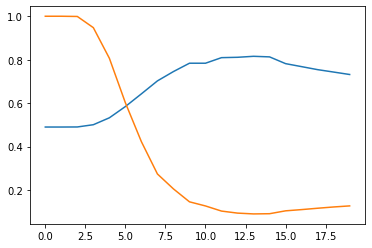

In [73]:
plt.plot(corrs[-1, :-1])
plt.plot(diffs/np.max(diffs))

In [74]:
print(np.argmin(diffs))
print(np.argmax(corrs[-1, :-1]))

13
13


20 61
26 36
11
15
12
17
(0.0, None)


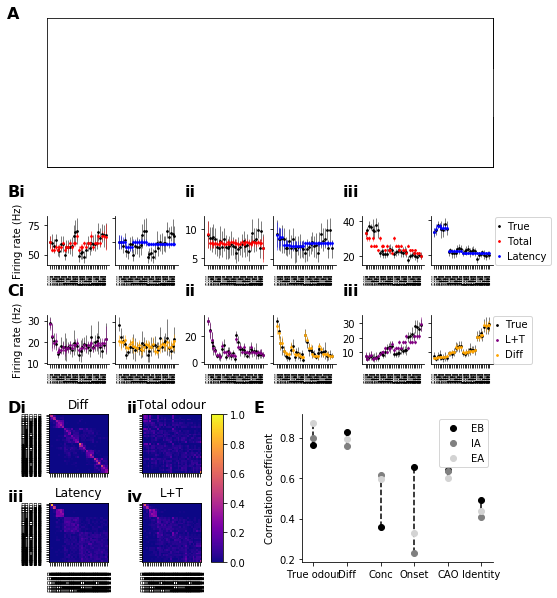

In [25]:
fig = plt.figure(figsize=(8, 10))
gs = GridSpec(6, 3, hspace=1, wspace=0.2, )
diff_ax1 = fig.add_subplot(gs[0, :])
diff_ax2 = fig.add_subplot(gs[1, :])
conc_vs_onset_args = plot_difference_distributions(diff_ax1, conc_models1, onset_models1)
cao_vs_diff_args = plot_difference_distributions(diff_ax2, cao_models1, diff_models1, color=['purple', 'orange'])
diff_ax1.set_xticks([])
diff_ax2.set_xticks([])
diff_ax1.set_yticks([])
diff_ax2.set_yticks([])

schem_ax = fig.add_subplot(gs[:2, :])
schem_ax.set_xticks([])
schem_ax.set_yticks([])


low_conc_model = conc_models1[conc_vs_onset_args[0]]
low_onset_model = onset_models1[conc_vs_onset_args[0]]
high_conc_model = conc_models1[conc_vs_onset_args[-1]]
high_onset_model = onset_models1[conc_vs_onset_args[-1]]
mid_conc_model = conc_models1[conc_vs_onset_args[65]]
mid_onset_model = onset_models1[conc_vs_onset_args[65]]
subgs1 = gs[2, 0].subgridspec(1, 2, wspace=0.1)
subgs2 = gs[2, 1].subgridspec(1, 2, wspace=0.1)
subgs3 = gs[2, 2].subgridspec(1, 2, wspace=0.1)

#sub_gs = gs[2:4, :].subgridspec(2, 6, wspace=0.5)

low_model_ax_cao1 = fig.add_subplot(subgs1[0])
low_model_ax_cao2 = fig.add_subplot(subgs1[1])
mid_model_ax_cao1 = fig.add_subplot(subgs2[0])
mid_model_ax_cao2 = fig.add_subplot(subgs2[1])
high_model_ax_cao1 = fig.add_subplot(subgs3[0])
high_model_ax_cao2 = fig.add_subplot(subgs3[1])

plot_split_models_response(low_model_ax_cao1, low_model_ax_cao2, low_conc_model, low_onset_model, isi=2, labels=['True','Total', 'Latency'], colors=['k', 'r', 'b'], legend=False)
plot_split_models_response(mid_model_ax_cao1, mid_model_ax_cao2, mid_conc_model, mid_onset_model, isi=2, colors=['k', 'r', 'b'], labels = ['True','Total', 'Latency'], legend=False)
plot_split_models_response(high_model_ax_cao1, high_model_ax_cao2, high_conc_model, high_onset_model, isi=2, labels=['True','Total', 'Latency'], colors=['k', 'r', 'b'], legend=False)
#plot_models_response(low_model_ax_cao, [low_conc_model, low_onset_model], isi=2, labels=['True', 'Conc', 'Onset'], colors=['k','r', 'b'], legend=False)
#plot_models_response(high_model_ax_cao, [high_conc_model, high_onset_model], isi=2, colors=['k','r', 'b'], labels=['True', 'Conc', 'Onset'])
#plot_models_response(mid_model_ax_cao, [mid_conc_model, mid_onset_model], isi=2, colors=['k','r', 'b'])
high_model_ax_cao2.legend(ncol=1, handlelength=0.0, bbox_to_anchor=(2, 0.5), loc='right')
low_model_ax_cao1.set_ylabel('Firing rate (Hz)')

[i.set_xticklabels(glyphs, fontsize=4) for i in [low_model_ax_cao1, low_model_ax_cao2, mid_model_ax_cao1, mid_model_ax_cao2, high_model_ax_cao1, high_model_ax_cao2]]

low_diff_model = diff_models1[cao_vs_diff_args[0]]
low_cao_model = cao_models1[cao_vs_diff_args[0]]
high_diff_model = diff_models1[cao_vs_diff_args[-1]]
high_cao_model = cao_models1[cao_vs_diff_args[-1]]
mid_diff_model = diff_models1[cao_vs_diff_args[65]]
mid_cao_model = cao_models1[cao_vs_diff_args[65]]

subgs1 = gs[3, 0].subgridspec(1, 2, wspace=0.1)
subgs2 = gs[3, 1].subgridspec(1, 2, wspace=0.1)
subgs3 = gs[3, 2].subgridspec(1, 2, wspace=0.1)


low_model_ax1 = fig.add_subplot(subgs1[0])
low_model_ax2 = fig.add_subplot(subgs1[1])
mid_model_ax1 = fig.add_subplot(subgs2[0])
mid_model_ax2 = fig.add_subplot(subgs2[1])
high_model_ax1 = fig.add_subplot(subgs3[0])
high_model_ax2 = fig.add_subplot(subgs3[1])
# low_model_ax = fig.add_subplot(gs[3, 0])
# mid_model_ax = fig.add_subplot(gs[3, 1])
# high_model_ax = fig.add_subplot(gs[3, 2])

# plot_models_response(low_model_ax, [low_cao_model, low_diff_model], isi=2, labels=['True', 'CAO', 'Diff'], colors=['k', 'purple','orange'], legend=False)
# plot_models_response(high_model_ax, [high_cao_model, high_diff_model], isi=2, colors=['k','purple','orange'], labels=['True', 'CAO', 'Diff'],)
# plot_models_response(mid_model_ax, [mid_cao_model, mid_diff_model], isi=2, colors=['k','purple','orange'])

plot_split_models_response(low_model_ax1, low_model_ax2, low_cao_model, low_diff_model, isi=2, labels=['True','L+T', 'Diff'], colors=['k', 'purple', 'orange'], legend=False)
plot_split_models_response(mid_model_ax1, mid_model_ax2, mid_cao_model, mid_diff_model, isi=2, colors=['k', 'purple', 'orange'], labels = ['True','L+T', 'Diff'], legend=False)
plot_split_models_response(high_model_ax1, high_model_ax2, high_cao_model, high_diff_model, isi=2, labels=['True','L+T', 'Diff'], colors=['k', 'purple', 'orange'], legend=False)

high_model_ax2.legend(ncol=1, handlelength=0.0, bbox_to_anchor=(1.7, 0.5), loc='right')
low_model_ax1.set_ylabel('Firing rate (Hz)')
[i.set_xticklabels(glyphs, fontsize=4) for i in [low_model_ax1, low_model_ax2, mid_model_ax1, mid_model_ax2, high_model_ax1, high_model_ax2]]


sub_gs = gs[-2:, :].subgridspec(2, 4, wspace=1, hspace=0.5)
cm_ax1 = fig.add_subplot(sub_gs[0, 0])
cm_ax2 = fig.add_subplot(sub_gs[0, 1])
cm_ax3 = fig.add_subplot(sub_gs[1, 0])
cm_ax4 = fig.add_subplot(sub_gs[1, 1])
corr_ax = fig.add_subplot(sub_gs[:, 2:])

im1, vmax1 = plot_best_cm(cm_ax1, cms1, cm_true1, show_xticks=False, colorbar=False)
im2, vmax2 = plot_best_cm(cm_ax2, cms_conc1, cm_true1, show_yticks=False, show_xticks=False, colorbar=False)
im3, vmax3 = plot_best_cm(cm_ax3, cms_onset1, cm_true1, show_yticks=True, colorbar=False)
im4, vmax4 = plot_best_cm(cm_ax4, cms_joined1, cm_true1, show_yticks=False, colorbar=False)
plot_correlations(true_corrs, diff_corrs, conc_corrs, onset_corrs, joined_corrs, identiy, ax=corr_ax)
print(im1.get_clim())
vmax = np.max([vmax1, vmax2, vmax3, vmax4])
[i.set_clim([0, vmax]) for i in [im1, im2, im3, im4]]
plt.draw()

# cm_ax1_pos = cm_ax1.get_position()
# cm_ax1.set_position([cm_ax1_pos.x0 + 0.05, cm_ax1_pos.y0, cm_ax1_pos.width, cm_ax1_pos.height])
# cm_ax3_pos = cm_ax3.get_position()
# cm_ax3.set_position([cm_ax3_pos.x0 + 0.05, cm_ax3_pos.y0, cm_ax3_pos.width, cm_ax3_pos.height])
cm_ax2_pos = cm_ax2.get_position()
cm_ax2.set_position([cm_ax2_pos.x0- 0.06, cm_ax2_pos.y0, cm_ax2_pos.width, cm_ax2_pos.height])
cm_ax4_pos = cm_ax4.get_position()
cm_ax4.set_position([cm_ax4_pos.x0- 0.06, cm_ax4_pos.y0, cm_ax4_pos.width, cm_ax4_pos.height])
cbar_ax = fig.add_axes([cm_ax2_pos.x0 + 0.06, cm_ax4_pos.y0, 0.02, 0.205])
plt.colorbar(im3, cax=cbar_ax)
cm_ax1.set_title('Diff')
cm_ax2.set_title('Total odour')
cm_ax3.set_title('Latency')
cm_ax4.set_title('L+T')
axes = [schem_ax, low_model_ax_cao1, mid_model_ax_cao1, high_model_ax_cao1, low_model_ax1, mid_model_ax1, high_model_ax1, cm_ax1, cm_ax2, cm_ax3, cm_ax4, corr_ax]
labels = ['A', 'Bi', 'ii', 'iii', 'Ci', 'ii', 'iii', 'Di', 'ii', 'iii', 'iv', 'E']
label_axes.label_axes(axes, labels, align_x=[[0, 1, 4, 7], [2, 5], [3, 6], [7, 9], [8, 10]], align_y= [[1, 2, 3], [4, 5, 6], [7, 8, 11], [9, 10]], fontweight='bold', fontsize=16, align_x_fun=np.min, align_y_fun=np.max, dx=[-0.01, -0.01, 0, 0, -0.01, 0, 0, -0.01, -0.015, -0.015, -0.02, -0.02], dy=[0, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, -0.02, -0.02, -0.02, -0.02, -0.02])
plt.savefig('230703_fig4.pdf', bbox_inches='tight')

0.0006003519779728961


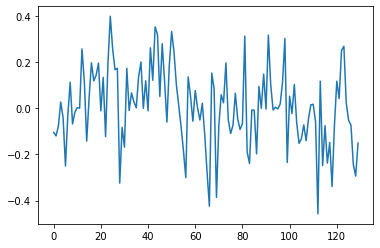

In [56]:
### Supplemetary stuff
[i.fit() for i in cao_models1]
[i.fit() for i in diff_models1]
cao_scores = np.array([i.fit_score for i in cao_models1])
diff_scores = np.array([i.fit_score for i in diff_models1])
plt.plot(cao_scores - diff_scores)
print(np.median(cao_scores - diff_scores))

In [48]:
print(np.argsort(cao_scores/diff_scores))

[ 75  99  76  80 126  55  79 117  69 112 118  66 114 105 107 103  83 116
 104  86 119  70  65 115  82  56 127  48  29  28 128   5  74  30 129  64
 125  14  85 101  54   0  62  93 106   1  59  40  22  95   2   8 108 111
  78  90   4   6  84   9  20  32  38  61  11  53  88  10 110  15  63 124
  71  94  17  77 109  35   7   3  97  58  13  89  67  57  68  60  19  52
  25  16  33  92 120  36  39  73  96  45 102  42 113  12 121  24 100  26
  46  37  21  34  72  87  27  49  98  23  47  18 122  41 123  51  44  31
  43  81  91  50]


In [24]:
print(cao_models1[ui].fit_score)
print(diff_models1[ui].fit_score)

0.27565305156997155
0.7332435922335321


0.22656695349171602
0.04464961555304127
31


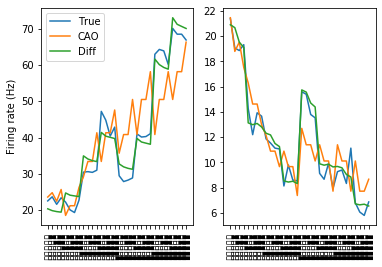

In [27]:
ui = 31
print(cao_models1[ui].fit_score)
print(diff_models1[ui].fit_score)
fig, ax = plt.subplots(1, 2, sharex=True)
ax[0].plot(cao_models1[91].true_resp, label='True')
ax[0].plot(cao_models1[91].pred_resp, label='CAO')
ax[0].plot(diff_models1[91].pred_resp, label='Diff')
ax[0].legend()
print(ui)
ax[0].set_xticks(range(32))
ax[0].set_xticklabels(glyphs, rotation=90)
ax[1].set_xticks(range(32))
ax[1].set_xticklabels(glyphs, rotation=90)
ax[1].plot(cao_models1[31].true_resp)
ax[1].plot(cao_models1[31].pred_resp)
ax[1].plot(diff_models1[31].pred_resp)
ax[0].set_ylabel('Firing rate (Hz)')
plt.savefig('230703_sup_fig_better_fit_examp_cell.pdf', bbox_inches='tight')

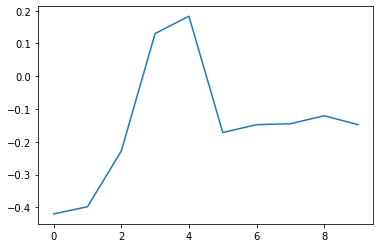

In [52]:
plt.plot(cao_models1[ui].opt_out.x[:-1])